# Before you start...

This page is not really ready for the whole world to use yet, so there are some quirks. There are three crucial files.

- [Pointset class](https://github.com/luccasiau/spanners/blob/main/src/py_models/pointset.py). Most of the time, you'll be working with this one. It represents pointsets, contains some useful information about them, and are fed to the PathGreedy algorithm. The file is quite documented.
- [Geo math](https://github.com/luccasiau/spanners/blob/main/src/py_models/geo_math.py). I implemented some basic operations that I was doing quite often, and they might save you some time too. The file should have (hopefully) good descriptions about what they are doing.
- [Euclidean Spanner class](https://github.com/luccasiau/spanners/blob/main/src/py_models/euclidean_spanner.py). I don't use this very much. It lets you represent a spanner graph in full capacity. That is, you get to actually add or remove edges, calculate stretch between points or of the whole graph, etc. It's useful if you want to try out different algorithms other than PathGreedy, or just experiment creatively. But, as a I mentioned, I mostly use the Pointset class.

**Point representation**. Each point is just an Numpy two-dimensional array, or `np.array([x_coordinate, y_coordinate])`. For simplicity, you can just write `point(x, y)`, which is just a function (implemented below) that makes code more readable.

**Running and drawing**:
- Use the function `draw_pathgreedy_from_pointset`. The inputs are just the pointset and the t ratio. Optionally, you can use img_w and img_h to make the output look nicer.
- CRUCIAL NOTE: The Y-coordinates will be flipped (that is, the Y-axis points downwards).

**Past pointsets**
- The [pointsets/](https://github.com/luccasiau/spanners/tree/main/src/pointsets) folder contains many pointsets I've saved through experimentation. The ones in the [hand/](https://github.com/luccasiau/spanners/tree/main/src/pointsets/hand) folder are the ones I generated myself using notebooks such as this. Some nice ones include the `pointsets/hand/example_deg4.txt`, which is similar to the one at EuroCG, and `pointsets/hand/example_not_plane.txt`, which is the one we just found about breaking planarity.
- The `pointsets/` folder is one level above, so you'll refer to it by using `../pointsets/`.

**Pro-tip for Jupyter notebooks** if you've never used them before. Command/Ctrl + Enter is a shortcut for running a cell.

# Initialization
This imports all needed library, tools, and defines constants and useful functions. You can ignore it, but it might be nice to know or edit what you need.

In [5]:
import turtle
import numpy as np
import os
import time
import math
import sys
from math import pi
import subprocess

sys.path.append('..')
from PIL import Image, ImageDraw
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import random
from py_models.geo_math import *
from py_models.draw_tools import *
from py_models.euclidean_spanner import EuclideanSpanner
from py_models.pointset import Pointset

In [6]:
PI = np.pi
PAPER_T = (3+4*PI)/3

In [19]:
def draw_pathgreedy_from_pointset(pointset, t=PAPER_T, img_w=300, img_h=300):
    pointset.print_all_to_file('temp_file.in')
    cmd = '../runs/printout_general_path_greedy_test ' + str(t) + ' < temp_file.in > temp_file.out'
    output = subprocess.check_output(cmd, shell=True)

    print('Pointset is' + (' ' if are_convex(pointset.points) else ' NOT ') + 'convex')
    print(output)
    ret = draw_line_segments(get_segments_from_file('temp_file.out'), img_w, img_h, pointset=pointset)
    subprocess.check_call(['rm', 'temp_file.in'])
    subprocess.check_call(['rm', 'temp_file.out'])
    return ret

In [20]:
def point(x, y):
    return np.array([x, y])

# Example

In [21]:
points = dict()
points[0] = point(0, 0)
points[1] = point(100.00001, 0)
points[2] = scale_vector(points[0], point_rotation(-PI/3, points[1], points[0]), .99999)
points[3] = scale_vector(points[0], point_rotation(-PI/3, points[2], points[0]), 1.000001)

# building right purple path, connecting 2 and 1.
eps = .0001
points[4] = scale_vector(points[2], point_rotation(PI+eps, points[3], points[2]), .9)
points[5] = scale_vector(points[4], point_rotation(PI+eps, points[2], points[4]), .8)
points[6] = scale_vector(points[1], point_rotation(PI-eps, points[0], points[1]), .9)
points[7] = scale_vector(points[6], point_rotation(PI-0.3, points[1], points[6]), .7)
points[8] = scale_vector(points[5], point_rotation(PI+0.4, points[4], points[5]), .5)

# building left purple path, connecting 3 to 0.
points[9]  = scale_vector(points[3], point_rotation(PI-eps, points[2], points[3]), .8)
points[10] = scale_vector(points[9], point_rotation(PI-eps, points[3], points[9]), .7)
points[11] = scale_vector(points[0], point_rotation(PI+eps, points[1], points[0]), .9)
points[12] = scale_vector(points[11], point_rotation(PI+0.1, points[0], points[11]), .8)
points[13] = scale_vector(points[10], point_rotation(PI-0.7, points[9], points[10]), .5)

Pointset is convex
b''
N = 14
Planarity: NOT PLANAR
Max degree: 2
Stretch: 5.05151



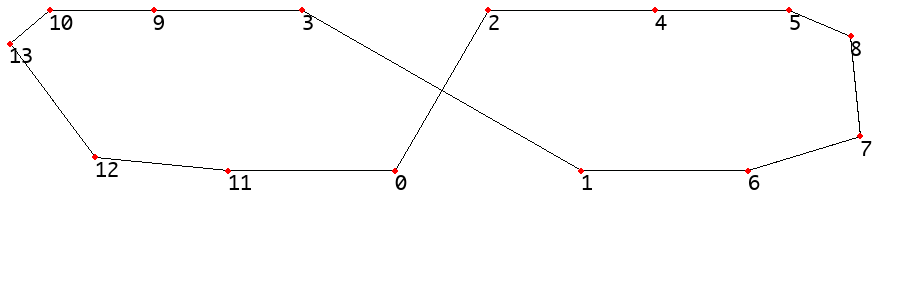

In [28]:
# Initializing pointset, then running and drawing
ps = Pointset(points=points, is_dict=True)
draw_pathgreedy_from_pointset(ps, t=PAPER_T, img_w=900, img_h=300)

#### Using alternative versions of the pointset constructor

In [26]:
# As a list
ps = Pointset(points=list(points.values()))

In [24]:
# From the file
ps = Pointset(file_path='../pointsets/hand/example_not_plane.txt')